In [1]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read in the insurance dataset- this data was downloaded from Kaggle.
insurance = pd.read_csv(r"C:\Users\srija\Downloads\Medicalpremium.csv")
insurance

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [9]:
# Create X & y values (features and labels)
X = insurance.drop("PremiumPrice", axis =1)
y = insurance["PremiumPrice"]

In [11]:
#View X 
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


In [13]:
#View y
y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [14]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)
len(X), len(X_train), len(X_test)

(986, 788, 198)

In [72]:
# Build a neural network
tf.random.set_seed(42)

#1.Create the model
insurance_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(75),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                       optimizer= tf.keras.optimizers.Adam(lr=0.1),
                       metrics= (["mae"]))
#3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 150)

Epoch 1/150
25/25 [==============================] - 0s 1ms/step - loss: 23488.2520 - mae: 23488.2520
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 15027.4414 - mae: 15027.4414
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 4594.4224 - mae: 4594.4224
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 3974.5530 - mae: 3974.5530
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 3839.1917 - mae: 3839.1917
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 3722.7466 - mae: 3722.7466
Epoch 7/150
25/25 [==============================] - 0s 1ms/step - loss: 3619.2512 - mae: 3619.2512
Epoch 8/150
25/25 [==============================] - 0s 1ms/step - loss: 3534.6177 - mae: 3534.6177
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 3466.7588 - mae: 3466.7588
Epoch 10/150
25/25 [==============================] - 0s 1ms/step - loss: 3386.7693 - mae: 3386.

25/25 [==============================] - 0s 1ms/step - loss: 2756.0981 - mae: 2756.0981
Epoch 83/150
25/25 [==============================] - 0s 1ms/step - loss: 2808.5356 - mae: 2808.5356
Epoch 84/150
25/25 [==============================] - 0s 1ms/step - loss: 2803.1494 - mae: 2803.1494
Epoch 85/150
25/25 [==============================] - 0s 1ms/step - loss: 2790.4460 - mae: 2790.4460
Epoch 86/150
25/25 [==============================] - 0s 1ms/step - loss: 2826.4626 - mae: 2826.4626
Epoch 87/150
25/25 [==============================] - 0s 1ms/step - loss: 2758.4695 - mae: 2758.4695
Epoch 88/150
25/25 [==============================] - 0s 1ms/step - loss: 2757.0371 - mae: 2757.0371
Epoch 89/150
25/25 [==============================] - 0s 1ms/step - loss: 2765.2278 - mae: 2765.2278
Epoch 90/150
25/25 [==============================] - 0s 1ms/step - loss: 2763.9626 - mae: 2763.9626
Epoch 91/150
25/25 [==============================] - 0s 1ms/step - loss: 2769.0210 - mae: 2769.0210
Epo

In [73]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 2714.8408 - mae: 2714.8408


[2714.8408203125, 2714.8408203125]

### Model not peforming too well, we can try to normalize the data and see if it performs better!

In [78]:
# prepare (pre-process) data.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Create a column transformer
ct = make_column_transformer(
(MinMaxScaler(), ["Age","Diabetes","BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases", "Height", "Weight", "KnownAllergies",
                 "HistoryOfCancerInFamily", "NumberOfMajorSurgeries"])
)

#Create X & y
X = insurance.drop("PremiumPrice", axis =1)
y = insurance["PremiumPrice"]

# Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Fit the column transformer to our training data 
ct.fit(X_train)  # note only fitting X_train since we are predicting y and should not normalize it.

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)




In [83]:
X_train_normal[0]

array([0.02083333, 0.        , 0.        , 0.        , 0.        ,
       0.02380952, 0.04938272, 0.        , 0.        , 0.        ])

Now let's build a neural network to see if "mae" improves!

In [94]:
#set a random seed.
tf.random.set_seed(42)

#1. Build the model
insurance_model_n = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_n.compile(loss= tf.keras.losses.mae,
                         optimizer= tf.keras.optimizers.Adam(lr=0.1),
                         metrics= (["mae"]))
#3. Fit the model
history = insurance_model_n.fit(X_train_normal, y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 0s 1ms/step - loss: 24257.6250 - mae: 24257.6250
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 24138.6211 - mae: 24138.6211
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 23805.8906 - mae: 23805.8906
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 23211.5371 - mae: 23211.5371
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 22330.5352 - mae: 22330.5352
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 21171.2344 - mae: 21171.2344
Epoch 7/150
25/25 [==============================] - 0s 1ms/step - loss: 19720.7559 - mae: 19720.7559
Epoch 8/150
25/25 [==============================] - 0s 1ms/step - loss: 17996.6719 - mae: 17996.6719
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 15990.4014 - mae: 15990.4014
Epoch 10/150
25/25 [==============================] - 0s 1ms/step - loss: 13711.33

Epoch 82/150
25/25 [==============================] - 0s 1ms/step - loss: 2771.6162 - mae: 2771.6162
Epoch 83/150
25/25 [==============================] - 0s 1ms/step - loss: 2764.9524 - mae: 2764.9524
Epoch 84/150
25/25 [==============================] - 0s 1ms/step - loss: 2755.2402 - mae: 2755.2402
Epoch 85/150
25/25 [==============================] - 0s 1ms/step - loss: 2749.9841 - mae: 2749.9841
Epoch 86/150
25/25 [==============================] - 0s 1ms/step - loss: 2743.6475 - mae: 2743.6475
Epoch 87/150
25/25 [==============================] - 0s 1ms/step - loss: 2739.3867 - mae: 2739.3867
Epoch 88/150
25/25 [==============================] - 0s 1ms/step - loss: 2734.3118 - mae: 2734.3118
Epoch 89/150
25/25 [==============================] - 0s 1ms/step - loss: 2728.7871 - mae: 2728.7871
Epoch 90/150
25/25 [==============================] - 0s 1ms/step - loss: 2723.8188 - mae: 2723.8188
Epoch 91/150
25/25 [==============================] - 0s 1ms/step - loss: 2719.9917 - mae: 

Text(0, 0.5, 'loss')

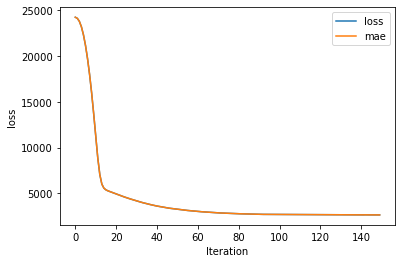

In [95]:
# plot iteration vs loss
pd.DataFrame(history.history).plot()
plt.xlabel("Iteration")
plt.ylabel("loss")

In [93]:
# Evaluate the model on normalized data
insurance_model_n.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 2560.6770 - mae: 2560.6770


[2560.677001953125, 2560.677001953125]

Performed a bit better on test data!  

In [102]:
# predict for a new client- took a data from insurance data and used model without normalization.
X_client = pd.read_csv(r'C:\Users\srija\Downloads\X_client.csv')
insurance_model.predict(X_client)
                       

array([[28298.016]], dtype=float32)

# Conclusion:
Since the mean absoulte error for insurance_model (without normalization) is 2711.  You could charge +/-2711 from 28298.  
The actual data has cost of $28000- not too bad of the model. You could try to improve the model a bit by trying various alogrithm.  Good starting point for prediction.